In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
csv = pd.read_csv("PLOTS - Sheet6.csv")
csv2 = pd.read_csv("PLOTS - Sheet7.csv")
csv3 = pd.read_csv("PLOTS - Sheet15.csv")

In [3]:
csv2

,Shortlist dim,MFLOPS,MAP@10
0,8,10.31,64.62
1,16,20.54,65.19
2,32,41.07,65.21


In [4]:
tableau_20 = [
"k",
"tab:orange",
"tab:red",
"tab:green",
"tab:purple",
"tab:brown",
"tab:pink",
"tab:gray",
"tab:olive",
"tab:cyan"
]


In [5]:
import matplotlib

cmap = matplotlib.cm.get_cmap('BuPu')

rgba = [cmap(i) for i in np.linspace(0.1, 1.0, 9)]

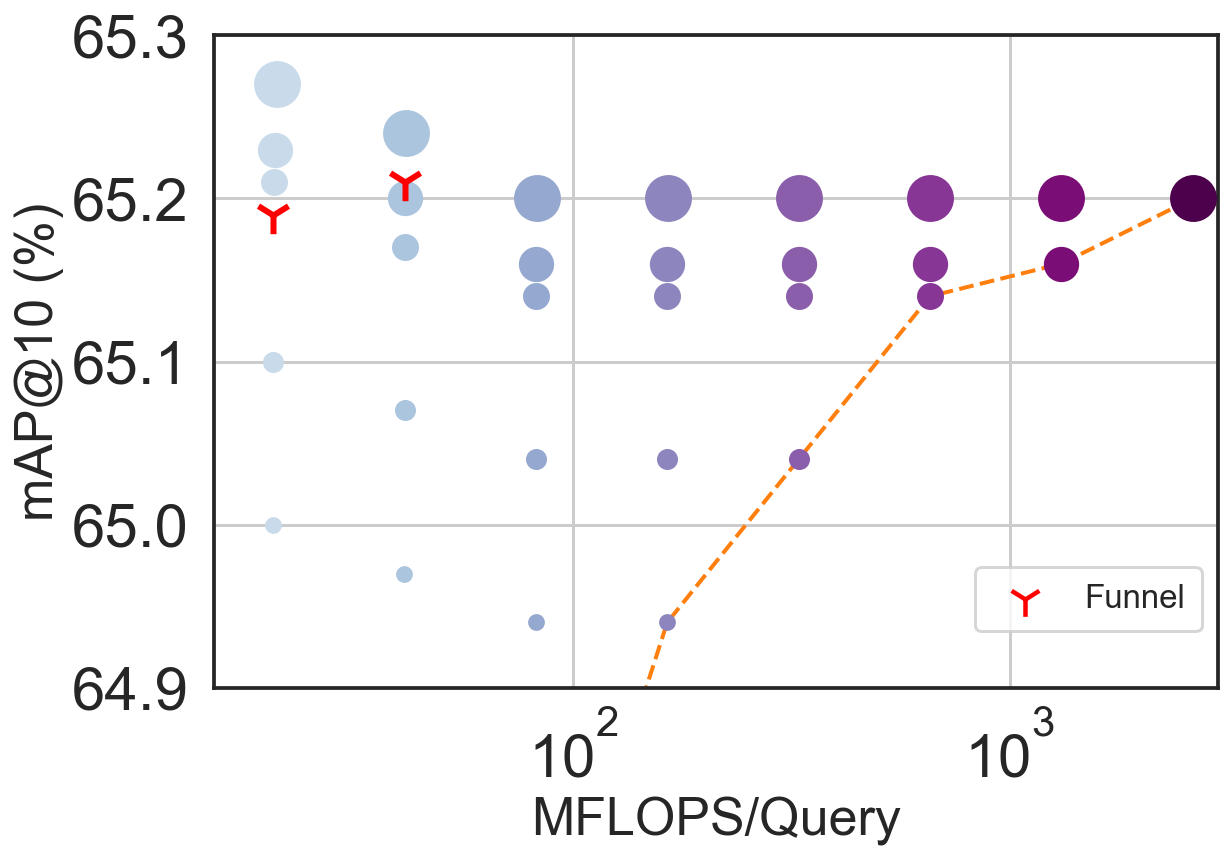

In [13]:
f, ax = plt.subplots(figsize=(9, 6))

sns.set_context('talk')
sns.set_style("white")
plt.ylim([64.9, 65.3])
plt.xlim([15, 3000])

markers = ['o', '^', 'v', 'h', '+', 'x', 'p', '*', 'D']
c=-1
for i in range(9):
    cmap = rgba[i]
    for j in range(i, 9):
        c+=1      
        m = markers[j]
        alpha=np.exp((csv["MAP@10"][c]-9))/(np.exp(5.5))
        if csv["MAP@10"][c]>14.1:
            alpha=0.8
        if csv["MAP@10"][c]>14.3:
            alpha=1
        plt.scatter(csv["MFLOPS"][c],
                    csv["MAP@10"][c],
                    marker='o',
                    linewidth=3,
                    linestyle='-',
                    zorder=30, color=cmap, alpha=alpha, sizes=[1.95**j*2])

fs=30
plt.yticks(fontsize=fs)
plt.xticks(fontsize=fs)
plt.xscale("log")
plt.yticks([64.9, 65.0, 65.1, 65.2, 65.3])
plt.xlabel("MFLOPS/Query", fontsize=26)
plt.ylabel("mAP@10 (%)", fontsize=26)
plt.grid()

plt.plot(csv3["FLOPS"], csv3["MAP@10"], linewidth=2, linestyle="--", color="tab:orange")


for c in range(len(csv2["MFLOPS"])):
    plt.scatter(csv2["MFLOPS"][c], csv2["MAP@10"][c], marker='1', zorder=30, sizes=[350], c='r', linewidth=3)

for i in range(9):
    plt.scatter([], [],  marker='o', label=f"{2**(i+3)}", c='steelblue', sizes=[1.75**i*2])

legend1 = plt.legend(loc=1, borderpad=0.2, bbox_to_anchor=(1.37, 0.89),title="$D_{r}$", prop={'size':15}, frameon=False)

foo=[]; lab=[f"{2**(i+3)}" for i in range(9)]
for i in range(9):
    foo.append(plt.scatter([], [],  marker="o", color=rgba[i]))
    
legend2 = plt.legend(foo, lab, loc=1, borderpad=0.2, bbox_to_anchor=(1.2, 0.89), title="$D_{s}$", prop={'size':15}, frameon=False)    
# for t in legend2.get_texts():
#     t.set_ha('center')
title = legend2.get_title()
title.set_fontsize('x-large')
# plt.gca().add_artist(legend2)



foo=[]; lab=["Funnel"]
foo.append(plt.scatter([], [],  marker="1", c="r", sizes=[300]))
legend2 = plt.legend(foo, lab, loc=1, borderpad=0.5, bbox_to_anchor=(1, 0.21))    


# foo=[]; lab=["1-shot"]
# foo.append(plt.plot([], [], linewidth=2, linestyle="--", color="tab:blue"))
# legend3 = plt.legend(foo, lab, loc=1, borderpad=0.5, bbox_to_anchor=(1, 0.21))    

# plt.gca().add_artist(legend2)
plt.savefig("MAP_1K.pdf", bbox_inches="tight")